In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transacoes = pd.read_csv("transacoes.csv")

In [5]:
plt.style.use('ggplot')

## Analisando Total de Entrada e Saída

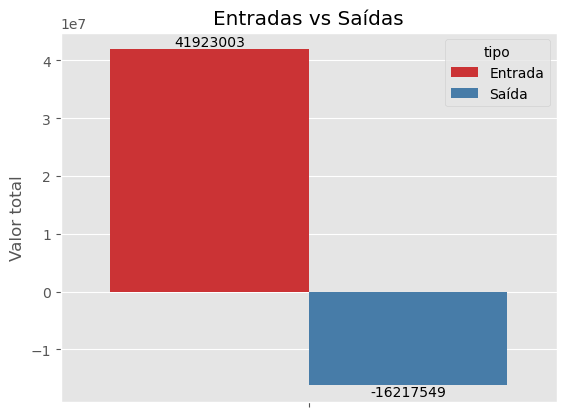

In [10]:
transacoes ['tipo'] = transacoes ['valor_transacao'].apply(lambda x: 'Entrada' if x > 0 else 'Saída')

resumo = transacoes .groupby('tipo')['valor_transacao'].sum().reset_index()


ax = sns.barplot(data=resumo, hue='tipo', y='valor_transacao', palette='Set1')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.title('Entradas vs Saídas')
plt.ylabel('Valor total')
plt.show()

# Dados obtidos: 

Soma das Entradas: R$ 41,9 milhões

Soma da saída: R$ 16,2 milhões


# Conclusão:
## Maior volume de entradas que de saídas. Isto é, banco está recebendo bem mais depósitos do que saques.

In [22]:
#Adicioando uma coluna somente com data
transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], errors='coerce')

In [27]:
transacoes['somente_data'] = transacoes['data_transacao'].dt.date

In [28]:
transacoes.head(10)

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,tipo,data_transacao_utc,somente_data
0,3100,256,2020-05-22 03:15:21+00:00,Saque,-130.0,Saída,2020-05-22 03:15:21+00:00,2020-05-22
1,28405,256,2021-06-29 11:52:38+00:00,Saque,-255.0,Saída,2021-06-29 11:52:38+00:00,2021-06-29
2,1776,512,2020-05-17 13:04:50+00:00,Saque,-250.0,Saída,2020-05-17 13:04:50+00:00,2020-05-17
3,14311,512,2020-09-06 02:55:34+00:00,Saque,-80.0,Saída,2020-09-06 02:55:34+00:00,2020-09-06
4,25012,512,2020-10-16 09:26:52+00:00,Saque,-475.0,Saída,2020-10-16 09:26:52+00:00,2020-10-16
5,26883,512,2020-11-09 00:47:27+00:00,Saque,-210.0,Saída,2020-11-09 00:47:27+00:00,2020-11-09
6,35017,512,2021-04-13 08:17:24+00:00,Saque,-50.0,Saída,2021-04-13 08:17:24+00:00,2021-04-13
7,46264,512,2021-05-01 06:25:50+00:00,Saque,-1160.0,Saída,2021-05-01 06:25:50+00:00,2021-05-01
8,21340,768,2020-02-14 21:42:15+00:00,Saque,-170.0,Saída,2020-02-14 21:42:15+00:00,2020-02-14
9,64259,1,2019-08-11 15:13:07+00:00,Saque,-245.0,Saída,2019-08-11 15:13:07+00:00,2019-08-11


In [29]:
transacoes.groupby(['nome_transacao', 'tipo'])['valor_transacao'].sum().sort_values(ascending=False)


nome_transacao                    tipo   
TED - Recebido                    Entrada    24383836.00
DOC - Recebido                    Entrada    13750175.00
Pix - Recebido                    Entrada     3064088.20
Depósito em espécie               Entrada      441165.67
Transferência entre CC - Crédito  Entrada      258543.70
Estorno de Debito                 Entrada       25194.92
Pix Saque                         Saída        -26305.00
Transferência entre CC - Débito   Saída       -150798.10
Pagamento de boleto               Saída       -515913.20
Saque                             Saída       -761840.00
Compra Débito                     Saída       -941593.50
Compra Crédito                    Saída      -1326533.79
DOC - Realizado                   Saída      -2326490.00
TED - Realizado                   Saída      -3411210.00
Pix - Realizado                   Saída      -6756865.50
Name: valor_transacao, dtype: float64

In [31]:
transacoes['somente_data'] = pd.to_datetime(transacoes['somente_data'], errors='coerce')


In [32]:
transacoes.groupby(['tipo', transacoes['somente_data'].dt.to_period('M')])['valor_transacao'].sum().unstack(0)


tipo,Entrada,Saída
somente_data,,
2010-02,295.30,-179.29
2010-03,1858.30,-291.34
2010-05,85.90,-70.84
2010-06,9983.11,-113.23
2010-07,594.00,-323.66
...,...,...
2022-09,743490.78,-329841.69
2022-10,519799.46,-422363.72
2022-11,1324778.94,-402869.84


In [35]:
transacoes.tail()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,tipo,data_transacao_utc,somente_data
71994,17007,764,NaT,Transferência entre CC - Crédito,82.3,Entrada,NaT,NaT
71995,22320,764,NaT,Transferência entre CC - Crédito,414.8,Entrada,NaT,NaT
71996,8697,509,2012-05-07 13:45:41+00:00,Transferência entre CC - Crédito,720.4,Entrada,2012-05-07 13:45:41+00:00,2012-05-07
71997,11574,766,2015-09-19 05:13:07+00:00,Transferência entre CC - Crédito,1143.0,Entrada,2015-09-19 05:13:07+00:00,2015-09-19
71998,64396,766,NaT,Transferência entre CC - Crédito,420.7,Entrada,NaT,NaT


In [36]:
transacoes['mes'] = transacoes['somente_data'].dt.to_period('M')

fluxo_mensal = transacoes.groupby(['mes', 'tipo'])['valor_transacao'].sum().unstack()


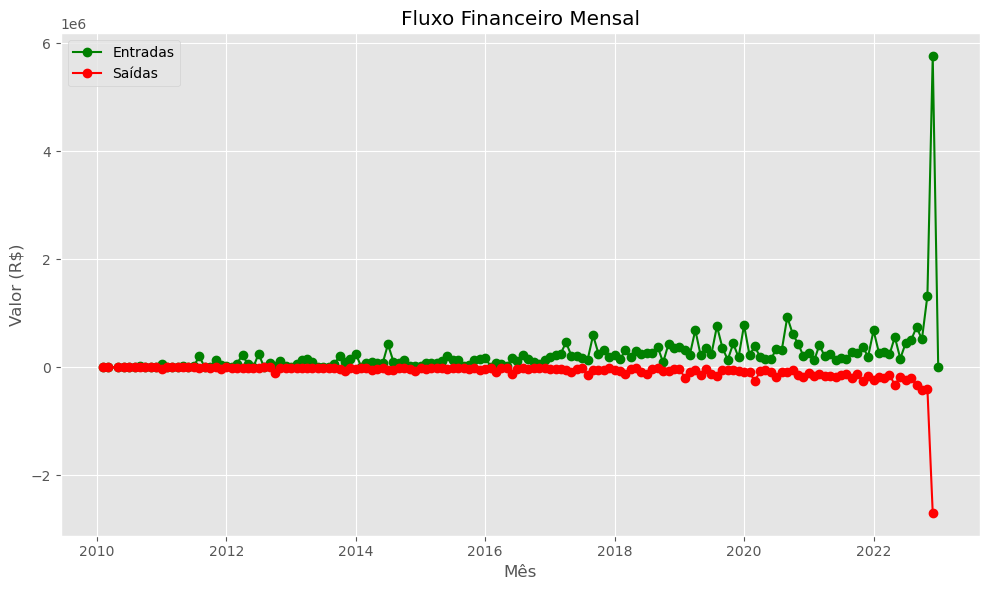

In [38]:

plt.figure(figsize=(10, 6))
plt.plot(fluxo_mensal.index.to_timestamp(), fluxo_mensal['Entrada'], label='Entradas', color='green', marker='o')
plt.plot(fluxo_mensal.index.to_timestamp(), fluxo_mensal['Saída'], label='Saídas', color='red', marker='o')

plt.title('Fluxo Financeiro Mensal')
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
